In [1]:
from netCDF4 import Dataset                     # For reading data
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt                 # For plotting
from matplotlib.patches import Rectangle
import numpy.ma as ma
import xray
import time

# Place figures within document
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 8.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# xray wrapper for MPAS, assumes year offset of 1700
from mpas_xray import preprocess_mpas, remove_repeated_time_index

# open up series of netcdf files and use the preprocess_mpas to get viable times
ds2 = xray.open_mfdataset('/net', preprocess=preprocess_mpas)

RuntimeError: NetCDF: Unknown file format

In [14]:
ds2.surfaceBuoyancyForcing.values[9,:].min()

0.0

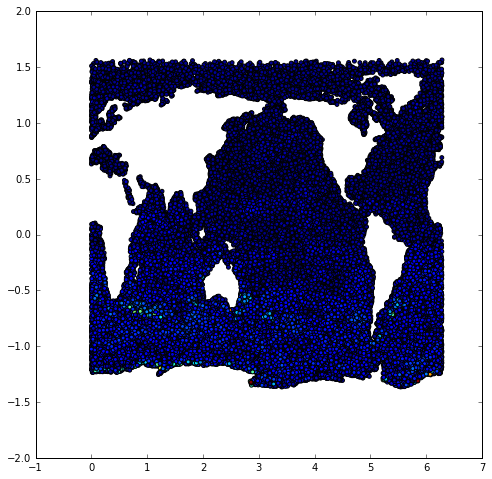

In [11]:
plt.scatter(ds2.lonCell.values[0,::20],ds2.latCell.values[0,::20],s=15,c=ds2.boundaryLayerDepth.values[9,::20], \
            vmin=1,vmax=500)

In [ ]:
fh=Dataset('/lustre/scratch3/turquoise/lvanroekel/lvanroekel/scvt/MPI-SCVT/mesh.nc',mode='r')
latCell = fh.variables['latCell'][:]
lonCell = fh.variables['lonCell'][:]
xCell = fh.variables['xCell'][:]
yCell = fh.variables['yCell'][:]
zCell = fh.variables['zCell'][:]

print latCell[10],lonCell[10],xCell[10],yCell[10],zCell[10]

In [ ]:
sin(latCell[10])

In [ ]:
nCells =dsmean.dims['nCells'];
nVertices = dsmean.dims['nVertices'];
nEdges = dsmean.dims['nEdges'];
nVertLevels = dsmean.dims['nVertLevels'];
nTime = 1;

In [ ]:
nX = 100
nY = 228

In [ ]:
#get grid information
xCell = dsmean.xCell.values;
yCell = dsmean.yCell.values;

refZMid = dsmean.refZMid.values;

xIndex = range(0,nX)
yIndex = range(0,nY)

xCell = xCell.reshape(nY,nX)
yCell = yCell.reshape(nY,nX)
xCell = np.array(xCell)
yCell = np.array(yCell)

xPosition=[]
for i in range(0,nX):
    xData = xCell[1,i] / 1000.0
    xPosition.append(xData)
    
yPosition=[]
for j in range(0,nY):
    yData = yCell[j,1] / 1000.0
    yPosition.append(yData)
       
refZMid = dsmean.refZMid.values[:];

xPosition = np.array(xPosition)
yPosition = np.array(yPosition)
zPosition = np.array(refZMid)

In [ ]:
type(nVertLevels)

In [ ]:
#get 3D ocean mask based on maxLevelCell

maxLevelCell = dsmean.maxLevelCell.values[:]

oceanMask=[]
for iCell in range(0,nCells):
    for k in range(0,int(maxLevelCell[iCell])):
        oceanMask.append(1)
    for k in range(int(maxLevelCell[iCell]),nVertLevels):
        oceanMask.append(NaN)
    
oceanMask = np.array(oceanMask)
oceanMask = oceanMask.reshape(nCells,nVertLevels)
print oceanMask.shape
oceanMask = oceanMask.reshape(nY,nX,nVertLevels)

minVal = -0.2
maxVal = 1.2
incVal = 0.1
plotData = oceanMask[:,8,:]
plt.contourf(yPosition, zPosition, plotData.T, levels=numpy.arange(minVal,maxVal,incVal));
plt.colorbar();


In [ ]:
#temperature
temperature = dsmean.temperature.values;
temperature = temperature.reshape(nY,nX,nVertLevels)

#salinity
salinity = dsmean.salinity.values;
salinity = salinity.reshape(nY,nX,nVertLevels)

#thickness
thickness = dsmean.layerThickness.values;
thickness = thickness.reshape(nY,nX,nVertLevels)

In [ ]:
#must construct zmid and ztop once thickness interpolated

#u velocity
zonalV = dsmean.velocityZonal.values;
zonalV = zonalV.reshape(nY,nX,nVertLevels);

#v velocity
meridionalV = dsmean.velocityMeridional.values;
meridionalV = meridionalV.reshape(nY,nX,nVertLevels);

In [ ]:
dsmean.ssh.values.shape

In [ ]:
ssh = dsmean.ssh.values;
ssh = ssh.reshape(nY,nX);

In [ ]:
maxL = dsmean.maxLevelCell.values;
maxL = maxL.reshape(nY,nX);

In [ ]:
tempMean = temperature.mean(axis=1)
saltMean = salinity.mean(axis=1)
zonalMean = zonalV.mean(axis=1)
meridMean = meridionalV.mean(axis=1)
thickMean = thickness.mean(axis=1)
sshMean = ssh.mean(axis=1);
maxLMean = maxL.mean(axis=1);

In [ ]:
ynew=yPosition*20*np.pi/180*6378*1000/2000

In [ ]:
(ynew[1]-ynew[0])/6378000*180/np.pi

In [ ]:
lats=-70*np.pi/180*np.ones(len(ynew))
for i in range(1,len(lats)):
    lats[i] = lats[i-1] + (ynew[i] - ynew[i-1])/6378000.0

In [ ]:
lats.min()*180/np.pi

In [ ]:
ds.refBottomDepth.values.shape

In [ ]:
ncid=Dataset('/users/')

In [ ]:
#dump to a netcdf file to avoid reInterpolation

import os
file='ziso_mean_data.nc'
os.remove(file)

ncid=Dataset(file,mode='w',clobber=True, format='NETCDF3_CLASSIC')

ncid.createDimension('nY',nY)
#ncid.createDimension('Time',None)
ncid.createDimension('nZ',100)
meanTemp = ncid.createVariable('tempMean','d',('nY','nZ'))
meanSalt = ncid.createVariable('saltMean','d',('nY','nZ'))
meanzona = ncid.createVariable('zonalMean','d',('nY','nZ'))
meanmeri = ncid.createVariable('meridMean','d',('nY','nZ'))
meanthic = ncid.createVariable('thickMean','d',('nY','nZ'))
meanssh = ncid.createVariable('sshMean','d',('nY'))
yout = ncid.createVariable('yCell','d',('nY'))
latout = ncid.createVariable('latCell','d',('nY'))
maxlev = ncid.createVariable('maxLevelCell','d',('nY'))
refbot = ncid.createVariable('refBottomdepth','d',('nZ'))

meanTemp[:,:] = tempMean;
meanSalt[:,:] = saltMean;
meanzona[:,:] = zonalMean;
meanmeri[:,:] = meridMean;
meanthic[:,:] = thickMean;
meanssh[:] = sshMean;
yout[:] = ynew;
latout[:] = lats;
maxlev[:] = maxLMean;
refbot[:] = ds.refBottomDepth.values[0,:]
ncid.close();



In [ ]:
#New step, copy down to 

In [ ]:
#Next import data and blow out to some number of lons then write out, should be done then

In [ ]:
# xray wrapper for MPAS, assumes year offset of 1700
from mpas_xray import preprocess_mpas, remove_repeated_time_index

# open up series of netcdf files and use the preprocess_mpas to get viable times
ds = xray.open_mfdataset('/users/lvanroekel/ziso_mean_data.nc')

In [ ]:
nX=1
lonVals = linspace(0,2*np.pi,nX)
temp = np.zeros((nX,ds.dims['nY']/2,ds.dims['nZ']))
salt = np.copy(temp)
u = np.copy(temp)
v = np.copy(temp)
thick = np.copy(temp)
zmid = np.copy(temp)
ztop = np.copy(temp)
lon = np.zeros((nX,ds.dims['nY']/2))
lat = np.copy(lon)
ssh = np.copy(lon)
xC = np.copy(lon)
yC = np.copy(lon)

#Form lat/lon arrays first and a zmid/ztop slice
ztop[0,:,0]=ds.sshMean.values[::2]
for j in range(1,ds.dims['nZ']):
    ztop[0,:,j]=ztop[0,:,j-1] - ds.thickMean.values[::2,j]

zmid[0,:,0] = ds.sshMean.values[::2] - 0.5*(ds.thickMean.values[::2,0])
for j in range(1,ds.dims['nZ']):
    zmid[0,:,j] = zmid[0,:,j-1] - 0.5*(ds.thickMean.values[::2,j-1]+ds.thickMean.values[::2,j])

In [ ]:
botDep = ds2.bottomDepth.values[:]
botDep = botDep.reshape(460,200)
botMean = botDep.mean(axis=1)

In [ ]:
pdata = tempMean*oceanMask[:,8,:]
plt.contourf(yPosition,zPosition,pdata.T,levels=np.linspace(-2,6,15))
plt.colorbar()

In [ ]:
maxlev = np.zeros((nX,ds.dims['nY']/2))
botDep2 = np.zeros((nX,ds.dims['nY']/2))
for i in range(nX):
    lon[i,:]=np.ones(ds.dims['nY']/2)*lonVals[i];
    lat[i,:]=ds.latCell.values[::2];
    temp[i,:,:]=ds.tempMean.values[::2,:];
    ssh[i,:]=ds.sshMean.values[::2];
    thick[i,:,:]=ds.thickMean.values[::2,:];
    u[i,:,:]=ds.zonalMean.values[::2,:];
    v[i,:,:]=ds.meridMean.values[::2,:];
    salt[i,:,:]=ds.saltMean.values[::2,:];
    zmid[i,:,:]=zmid[0,:,:];
    ztop[i,:,:]=ztop[0,:,:];
    yC[i,:]=ds.yCell.values[::2];
    xC[i,:]=np.cos(lonVals[i])*np.cos(ds.latCell.values[::2]);
    maxlev[i,:] = ds.maxLevelCell.values[::2]
    botDep2[i,:] = botMean[::2]

In [ ]:
from collections import OrderedDict

xl = xC.reshape(nX*ds.dims['nY'])
yl = yC.reshape(nX*ds.dims['nY'])
tmp = OrderedDict()
for point in zip(xl, yl):
    tmp.setdefault(point[:2], point)

mypoints = tmp.values()

In [ ]:
len(mypoints)

In [ ]:
ncid=Dataset('/usr/projects/climate/lvanroekel/input_data_2d.nc',mode='r+')
ncid.variables['latCell'][:]-=10.0*np.pi/180.0
#lat[:]=lat[:]-10*np.pi/180
ncid.close()

In [3]:
ncid=Dataset('/usr/projects/climate/lvanroekel/input_data_2d.nc',mode='r+')
lat=ncid.variables['latCell'][:]
temp3=ncid.variables['temperature'][:]
thick3=ncid.variables['layerThickness'][:]
temp3[0,:,0].min()

-0.0023262144342333572

In [17]:
ncid=Dataset('/usr/projects/climate/lvanroekel/init_out_new.nc',mode='r+')
#things to load
# maxLevelCell, zMid, temperature, salinity
maxLev=ncid.variables['maxLevelCell'][:]
thick=ncid.variables['layerThickness'][:]
temp=ncid.variables['temperature'][:]
salt=ncid.variables['salinity'][:]
bot=ncid.variables['bottomDepth'][:]

In [3]:
ncid=Dataset('/net/scratch1/lvanroekel/MPAS/test_cases/ocean/ocean/ziso/5km/default/init_step2/init.nc',mode='r+')
#things to load
# maxLevelCell, zMid, temperature, salinity
maxLev1=ncid.variables['maxLevelCell'][:]
thick1=ncid.variables['layerThickness'][:]
temp1=ncid.variables['temperature'][:]
salt1=ncid.variables['salinity'][:]
bot1=ncid.variables['bottomDepth'][:]

In [33]:
ncid=Dataset('/net/scratch3/lvanroekel/ZISO_GLOBAL/oldMesh/init.nc',mode='r+')
#things to load
# maxLevelCell, zMid, temperature, salinity
maxLev2=ncid.variables['maxLevelCell'][:]
thick2=ncid.variables['layerThickness'][:]
temp2=ncid.variables['temperature'][:]
salt2=ncid.variables['salinity'][:]
bot2=ncid.variables['bottomDepth'][:]

(1, 230, 100)

In [37]:
print thick.min(), thick1.min(), thick2.min(), temp.min(), temp1.min(), temp3.min(), temp2.min()

0.880681133209 0.880833333333 0.629014466543 -0.809180632465 2.14233437581 -1e+34 -0.809180632465


(-1, 6)

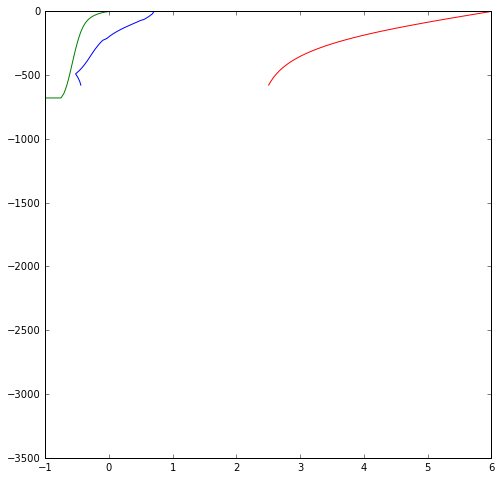

In [51]:
nc=40
zmid=np.zeros(100)
zmid[0] = - 0.5*(thick[0,nc,0])
for j in range(1,100):
    zmid[j] = zmid[j-1] - 0.5*(thick[0,nc,j-1]+thick[0,nc,j])
plt.plot(temp[0,nc,:maxLev[nc]-1],zmid[:maxLev[nc]-1])

nc=40
zmid=np.zeros(100)
zmid[0] = - 0.5*(thick[0,nc,0])
for j in range(1,100):
    zmid[j] = zmid[j-1] - 0.5*(thick1[0,nc,j-1]+thick1[0,nc,j])
plt.plot(temp1[0,nc,:maxLev1[nc]-1],zmid[:maxLev1[nc]-1],'r')

zmid=np.zeros(100)
zmid[0] = - 0.5*(thick3[0,1,0])
for j in range(1,100):
    zmid[j] = zmid[j-1] - 0.5*(thick1[0,1,j-1]+thick1[0,1,j])
plt.plot(temp3[0,1,:],zmid[:],'g')
plt.xlim(-1,6)

In [7]:
for i in range(133305):
#for i in range(50):
    first=True
    dep=0.5*thick[0,i,0]
    for k in range(1,100):
        if dep > 2500:
            if first:
                spot=k-1
                first=False
            temp[0,i,k]=temp[0,i,spot]
            salt[0,i,k]=salt[0,i,spot]
        dep += 0.5*(thick[0,i,k-1]+thick[0,i,k])

In [8]:
ncid.variables['temperature'][:,:,:]=temp
ncid.variables['salinity'][:,:,:]=salt
ncid.close()

In [ ]:
#dump to a netcdf file to avoid reInterpolation

import os
file='/usr/projects/climate/lvanroekel/input_data_2d.nc'
#os.remove(file)

ncid=Dataset(file,mode='w',clobber=True, format='NETCDF3_CLASSIC')
nZ=100;
ncid.createDimension('nVertLevels',100)
ncid.createDimension('Time',None)
ncid.createDimension('nCells',nX*ds.dims['nY']/2)

temperature = ncid.createVariable('temperature','d',('Time','nCells','nVertLevels'))
salinity = ncid.createVariable('salinity','d',('Time','nCells','nVertLevels'))
velocityZonal = ncid.createVariable('velocityZonal','d',('Time','nCells','nVertLevels'))
velocityMeridional = ncid.createVariable('velocityMeridional','d',('Time','nCells','nVertLevels'))
layerThickness = ncid.createVariable('layerThickness','d',('Time','nCells','nVertLevels'))
zMid = ncid.createVariable('zMid','d',('Time','nCells','nVertLevels'))
zTop = ncid.createVariable('zTop','d',('Time','nCells','nVertLevels'))
sshN = ncid.createVariable('ssh','d',('Time','nCells'))
yCell = ncid.createVariable('yCell','d',('nCells'))
xCell = ncid.createVariable('xCell','d',('nCells'))
latCell = ncid.createVariable('latCell','d',('nCells'))
lonCell = ncid.createVariable('lonCell','d',('nCells'))
botDep3 = ncid.createVariable('bottomDepth','d',('nCells'))

maxlevC = ncid.createVariable('maxLevelCell','i',('nCells'))
refbot = ncid.createVariable('refBottomDepth','d',('nVertLevels'))
refZm = ncid.createVariable('refZMid','d',('nVertLevels'))

temperature[0,:,:]=temp.reshape((nX*ds.dims['nY']/2,nZ))
salinity[0,:,:]=salt.reshape((nX*ds.dims['nY']/2,nZ))
velocityZonal[0,:,:]=u.reshape((nX*ds.dims['nY']/2,nZ))
velocityMeridional[0,:,:]=v.reshape((nX*ds.dims['nY']/2,nZ))
layerThickness[0,:,:]=thick.reshape((nX*ds.dims['nY']/2,nZ))
zTop[0,:,:]=ztop.reshape((nX*ds.dims['nY']/2,nZ))
zMid[0,:,:]=zmid.reshape((nX*ds.dims['nY']/2,nZ))
maxlevC[:]=maxlev.reshape(nX*ds.dims['nY']/2)
xCell[:]=xC.reshape(nX*ds.dims['nY']/2)
yCell[:]=yC.reshape(nX*ds.dims['nY']/2)
latCell[:]=lat.reshape(nX*ds.dims['nY']/2)
lonCell[:]=lon.reshape(nX*ds.dims['nY']/2)
sshN[0,:]=ssh.reshape(nX*ds.dims['nY']/2)
refbot[:]=ds.refBottomdepth.values[:]
botDep3[:]=botDep2.reshape(nX*ds.dims['nY']/2)

refz=np.zeros(100)
refz[0]=ds.refBottomdepth.values[0]*0.5
for i in range(1,100):
    refz[i]=0.5*(ds.refBottomdepth.values[j-1]+ds.refBottomdepth.values[j])

refZm[:]=refz[:]

ncid.close();


In [ ]:
dss = xray.open_mfdataset('/usr/projects/climate/lvanroekel/input_data.nc')

In [ ]:
#get normal Velocity on new grid
# cellson Edge and angEdge to get normal velocity
cone = dsmean.cellsOnEdge.values
ange = dsmean.angleEdge.values

normalVelocity = np.copy(zonalV);

for i in range(nCells):
    normalVelocity[i,:] = np.cos(ang)

for i in range(nEdges):
    c1 = cone[i,0]
    c2 = cone[i,1]
    
    avZonal = 0.5*(zonalV[c1,:] + zonalV[c2,:]);
    avMerid = 0.5*(meridionalV[c1,:] + meridionalV[c2,:]);
    
    normalVelocity

In [ ]:
ds1 = xray.open_mfdataset('/lustre/scratch3/turquoise/lvanroekel/ACME/cases/GACME_ALL_NEW/run/hist.*', preprocess=preprocess_mpas)
ds2 = xray.open_mfdataset('/lustre/scratch3/turquoise/lvanroekel/ACME/cases/GACME_BUOYFIX_NEW/run/hist.*', preprocess=preprocess_mpas)

In [ ]:
plt.scatter(ds1.lonCell.values[200,:],ds1.latCell.values[200,:],s=30,c=ds1.boundaryLayerDepth.values[198,:] \
                                                                                 ,vmin=5,vmax=50)

In [ ]:
np.squeeze(ds1.boundaryLayerDepth.values[200,:]).shape

In [ ]:
ds2.latCell.values.shape

In [ ]:
arr=[[0,1,2,3],[4,5,6,7]]

In [ ]:
np.asarray(arr).reshape(8,order='F')

In [ ]:
np.asarray(arr)

In [ ]:
np.asarray(arr).shape

In [ ]:
# xray wrapper for MPAS, assumes year offset of 1700
from mpas_xray import preprocess_mpas, remove_repeated_time_index

ds1= xray.open_mfdataset('/lustre/scratch3/turquoise/lvanroekel/forward/output/KPP_test.0000-01-01_00.00.00.nc',preprocess=preprocess_mpas)

In [ ]:
plt.scatter(ds1.xCell.values[:],ds1.yCell.values[:],s=20,c=ds1.temperature.values[200,:,0])

In [ ]:
ds2= xray.open_mfdataset('/lustre/scratch3/turquoise/lvanroekel/forward/forcing.nc')

In [ ]:
plt.scatter(ds1.xCell.values[:],ds1.yCell.values[:],s=20,c=ds2.temperatureSurfaceRestoringValue)